<a href="https://colab.research.google.com/github/fatimakhazaeni/fatimakhazaeni/blob/main/contproj_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

لطفا ماتریس مسیرها را به صورت لیستی از لیست ها وارد کنید. مثلا:[[1, 3, 4],[2, 4, 5],[3, 5],[2, 5, 1, 3]]
ماتریس مسیرها: [[1, 3, 4],[2, 4, 5],[3, 5],[2, 5, 1, 3]]
احتمال بحرانی شدن هر مسیر:
مسیر 1: 0.03
مسیر 2: 0.00
مسیر 3: 0.00
مسیر 4: 0.97
میانگین max_path_times: 17.980210006662546


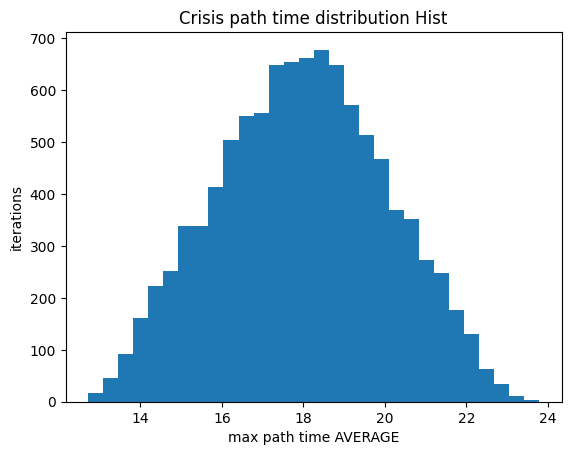

In [7]:
import random
import matplotlib.pyplot as plt

def calculate_path_time(path, task_times):
    """محاسبه زمان کل یک مسیر"""
    total_time = 0
    for task in path:
        total_time += task_times[task-1]
    return total_time

def monte_carlo_simulation(tasks, paths, iterations):
    """شبیه سازی مونت کارلو برای پیدا کردن مسیر بحرانی"""
    path_counts = [0] * len(paths)
    max_path_times = []
    for _ in range(iterations):
        task_times = [random.uniform(tasks[i][0], tasks[i][1]) for i in range(len(tasks))]
        path_times = [calculate_path_time(path, task_times) for path in paths]
        max_time = max(path_times)
        for i, time in enumerate(path_times):
            if time == max_time:
                path_counts[i] += 1
        max_path_times.append(max_time)

    # محاسبه احتمال بحرانی شدن هر مسیر
    path_probabilities = [count / iterations for count in path_counts]

    return path_probabilities, max_path_times

# دریافت ماتریس path از کاربر
print("لطفا ماتریس مسیرها را به صورت لیستی از لیست ها وارد کنید. مثلا:[[1, 3, 4],[2, 4, 5],[3, 5],[2, 5, 1, 3]]")
paths_str = input("ماتریس مسیرها: ")
paths = eval(paths_str)  # تبدیل رشته ورودی به لیست از لیست ها


iterations = 10000

tasks = [
  (1, 6),
  (3, 4),
  (5, 10),
  (1, 7),
  (3, 4)
]

path_probabilities, max_path_times = monte_carlo_simulation(tasks, paths, iterations)


# چاپ احتمال بحرانی شدن هر مسیر
print("احتمال بحرانی شدن هر مسیر:")
for i, probability in enumerate(path_probabilities):
    print(f"مسیر {i+1}: {probability:.2f}")

# محاسبه و چاپ میانگین max_path_times
average_max_path_time = sum(max_path_times) / len(max_path_times)
print("میانگین max_path_times:", average_max_path_time)

# رسم هیستوگرام
plt.hist(max_path_times, bins=30)
plt.xlabel('max path time AVERAGE')
plt.ylabel('iterations')
plt.title('Crisis path time distribution Hist')
plt.show()
